# TP1 - Champ électrique

## ARGUELLO Camilo

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display, Math

### A.3. Potentiel créé par un cercle chargé

In [53]:
### Constants

R = 1.5 # cm
x_1 = 2.5 # cm

In [54]:
### Mesures

xs = np.array([ -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ]) # cm
Vs = np.array([ 15, 11, 9.8, 7.5, 6.5, 5.7, 5, 4.5, 4, 3.5, 3.4, 2.8, 2.5, 2.2, 1 ]) # volts

In [55]:
## 6

init_rho = xs - x_1
final_rho = [r for r in init_rho if r >= R]
final_Vs = [V for r, V in zip(init_rho, Vs) if r >= R]
ln_rho = [np.log(r / R) for r in final_rho]

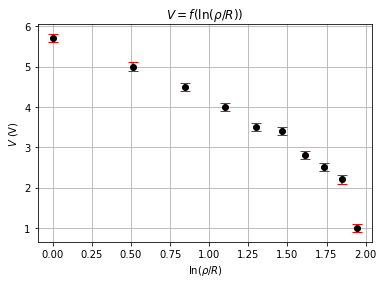

In [65]:
# Erreur
dVs = 0.1 # volts

# Plot
# On trace le graphique
plt.errorbar(ln_rho, final_Vs, yerr=dVs, fmt='o', color='black', ecolor='red', capsize=5)
plt.xlabel(r'$\ln(\rho / R)$')
plt.ylabel(r'$V$ (V)')
plt.title(r'$V = f(\ln(\rho / R))$')
plt.grid()
plt.show()

Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

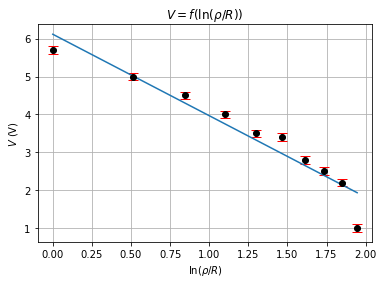

In [72]:
# Modèle

def f(params, x):
    Vr, V1 = params
    Vpred = Vr - np.array([V1 * xi for xi in x])
    return np.sum((Vpred - final_Vs) ** 2)

result = minimize(f, [15, 1], args=(ln_rho))

Vr, V1 = result.x   # Vr = Potentiel à l'infini
                    # V1 = Pente de la droite
print(result.message)
# display Vr et V1
display(Math(r'V_r = %.2f \, \text{V}' % Vr))
display(Math(r'V_1 = %.2f \, \text{V}' % V1))

x = np.linspace(min(ln_rho), max(ln_rho), 10)
y = Vr - V1 * x

plt.errorbar(ln_rho, final_Vs, yerr=dVs, fmt='o', color='black', ecolor='red', capsize=5)
plt.plot(x, y, label='Modèle')
plt.xlabel(r'$\ln(\rho / R)$')
plt.ylabel(r'$V$ (V)')
plt.title(r'$V = f(\ln(\rho / R))$')
plt.grid()
plt.show()

### B. Capacité du condensateur plan

In [73]:
# Constants 

d = 4 / 1000 # m
alpha_bleu = 10 # nC / V
alpha_rouge = 100 # nC / V

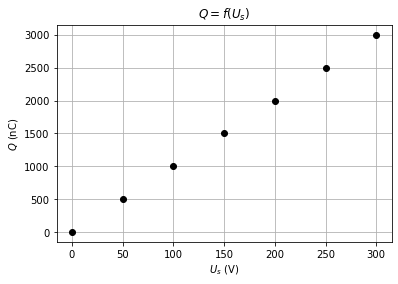

In [80]:
# Mesures

Us = np.array([ 0, 50, 100, 150, 200, 250, 300 ]) # Volts
Qs = alpha_bleu * Us # nC

plt.plot(Us, Qs, 'o', color='black')
plt.xlabel(r'$U_s$ (V)')
plt.ylabel(r'$Q$ (nC)')
plt.title(r'$Q = f(U_s)$')
plt.grid()

Optimization terminated successfully.


<IPython.core.display.Math object>

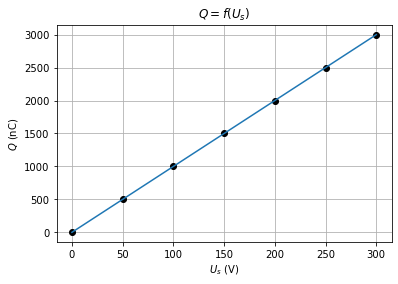

In [81]:
# Modèle

def f(params, x):
  C = params
  Qpred = C * x
  return np.sum((Qpred - Qs) ** 2)

result = minimize(f, [1], args=(Us))

print(result.message)

C = result.x[0]

display(Math(r'C = %.2f \, \text{F}' % C))

plt.plot(Us, Qs, 'o', color='black')
plt.plot(Us, C * Us, label='Modèle')
plt.xlabel(r'$U_s$ (V)')
plt.ylabel(r'$Q$ (nC)')
plt.title(r'$Q = f(U_s)$')
plt.grid()
plt.show()

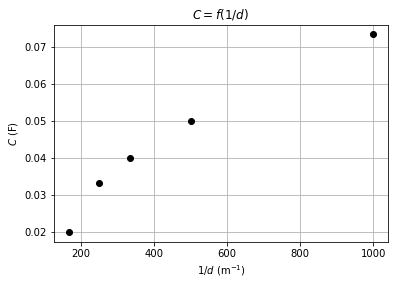

In [101]:
# 10.
Ui = 300 # Volts
ds = np.array([ 1, 2, 3, 4, 6 ]) / 1000 # m
Us = np.array([ 2.2, 1.5, 1.2, 1, .6 ]) # Volts
Qs = alpha_bleu * Us
Cs = Qs / Ui

plt.plot(1/ds, Cs, 'o', color='black')
plt.xlabel(r'$1/d$ (m$^{-1}$)')
plt.ylabel(r'$C$ (F)')
plt.title(r'$C = f(1/d)$')
plt.grid()
plt.show()


Optimization terminated successfully.


<IPython.core.display.Math object>

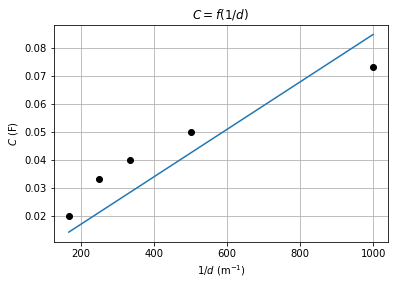

In [111]:
# Modèle

def f(params):
  C = params
  Cpred = C / ds
  return np.sum((Cpred - Cs) ** 2)

result = minimize(f, [1])

print(result.message)
C = result.x[0]
display(Math(r'C = %.2e \, \text{F}' % C))


plt.plot(1/ds, Cs, 'o', color='black')
plt.plot(1/ds, C / ds, label='Modèle')
plt.xlabel(r'$1/d$ (m$^{-1}$)')
plt.ylabel(r'$C$ (F)')
plt.title(r'$C = f(1/d)$')
plt.grid()
plt.show()